In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/PPW/tugas

/content/drive/MyDrive/PPW/tugas


In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

import re

import nltk
from nltk.corpus import stopwords

#stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import nltk

from nltk.tokenize import sent_tokenize

import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Path ke file di Google Drive (ubah sesuai lokasimu)
file_path = '/content/drive/MyDrive/PPW/tugas/satu-berita.csv'

# Baca file CSV
df = pd.read_csv(file_path)

df

,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita
0,"Analisis PPI: Di Tangan Presiden Prabowo, Indo...","TIMESINDONESIA, JAKARTA – Di bawah kepemimpina...",04/09/2024 - 23:35,Politik


In [ ]:
# Membuat list untuk menyimpan hasil
result_list = []

# Looping untuk memisahkan kalimat dari setiap berita
for index, row in df.iterrows():
    sentences = row['Isi Berita'].split('.')  # Pisahkan kalimat berdasarkan titik
    sentences = [s.strip() for s in sentences if s.strip()]  # Hilangkan spasi berlebih dan kosong
    for i, sentence in enumerate(sentences, 1):
        result_list.append({'kalimat ke n': f"Kalimat ke {i}", 'kalimat': sentence})

# Membuat DataFrame dari hasil pemisahan
result_df = pd.DataFrame(result_list)

# Tampilkan DataFrame
result_df

,kalimat ke n,kalimat
0,Kalimat ke 1,"TIMESINDONESIA, JAKARTA – Di bawah kepemimpina..."
1,Kalimat ke 2,Hal itu dengan fokus pada kemandirian pangan d...
2,Kalimat ke 3,Prabowo diharapkan mampu membawa Indonesia men...
3,Kalimat ke 4,Advertisement\nDemikian itu analisis dari Ketu...
4,Kalimat ke 5,ketika dimintai pendapatnya terkait prospek pe...
5,Kalimat ke 6,Setelah dilantik sebagai Presiden Republik Ind...
6,Kalimat ke 7,"""Setelah 20 Oktober, Prabowo akan menjadi ""med..."
7,Kalimat ke 8,Namanya akan harum dan popularitasnya mengalam...
8,Kalimat ke 9,Membangun Demokrasi yang Sehat\nMuhlis menilai...
9,Kalimat ke 10,"Diberbagai kesempatan, Prabowo menegaskan pent..."


In [ ]:
# Download stopwords untuk bahasa Indonesia
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

# Fungsi preprocessing yang disesuaikan
def remove_url(data_berita):
    url = re.compile(r'https?://\S+|www\.S+')
    return url.sub(r'', data_berita)

def remove_html(data_berita):
    html = re.compile(r'<.#?>')
    return html.sub(r'', data_berita)

def remove_emoji(data_berita):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticon
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', data_berita)

def remove_numbers(data_berita):
    data_berita = re.sub(r'\d+', '', data_berita)
    return data_berita

def remove_symbols(data_berita):
    data_berita = re.sub(r'[^a-zA-Z0-9\s]', '', data_berita)
    return data_berita

def case_folding(text):
    if isinstance(text, str):
        return text.lower()
    return text

def tokenize(text):
    return text.split()

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return [stemmer.stem(word) for word in text]

# Looping setiap kalimat di dataframe 'result_df'
result_df['clean'] = result_df['kalimat'].apply(remove_url)
result_df['clean'] = result_df['clean'].apply(remove_html)
result_df['clean'] = result_df['clean'].apply(remove_emoji)
result_df['clean'] = result_df['clean'].apply(remove_symbols)
result_df['clean'] = result_df['clean'].apply(remove_numbers)
result_df['clean'] = result_df['clean'].apply(case_folding)
result_df['tokenize'] = result_df['clean'].apply(tokenize)
result_df['stopword removal'] = result_df['tokenize'].apply(remove_stopwords)
result_df['stemming'] = result_df['stopword removal'].apply(stemming)

# Gabungkan kata setelah stemming
result_df['final'] = result_df['stemming'].apply(lambda x: ' '.join(x))

# Tampilkan hasil dataframe
result_df[['kalimat ke n', 'final']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,kalimat ke n,final
0,Kalimat ke 1,timesindonesia jakarta pimpin presiden ri prab...
1,Kalimat ke 2,fokus mandiri pangan energi kuat ekonomi tega ...
2,Kalimat ke 3,prabowo harap bawa indonesia era kuat regional...
3,Kalimat ke 4,advertisement analisis ketua poros pemuda indo...
4,Kalimat ke 5,dapat kait prospek perintah prabowo rabu muhli...
5,Kalimat ke 6,lantik presiden republik indonesia oktober pra...
6,Kalimat ke 7,oktober prabowo media darling simbol harap rakyat
7,Kalimat ke 8,nama harum popularitas alami lonjak perintah k...
8,Kalimat ke 9,bangun demokrasi sehat muhlis nilai prabowo mi...
9,Kalimat ke 10,bagai sempat prabowo demokrasi sehat kelola ku...


In [ ]:
# Gabungkan semua kalimat hasil stemming menjadi dokumen untuk tiap kalimat
documents = result_df['final'].tolist()

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Terapkan TF-IDF ke dokumen (kalimat yang sudah dipreproses)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Mendapatkan nama-nama fitur (kata-kata)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Mengubah hasil TF-IDF menjadi dataframe
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Tambahkan kolom 'no' dan 'kalimat ke n' untuk identifikasi
tfidf_df.insert(0, 'kalimat ke n', result_df['kalimat ke n'])

# Tampilkan dataframe dengan skor TF-IDF
tfidf_df

,kalimat ke n,acara,acu,adil,adu,advertisement,agenda,ajak,akses,aktif,...,ungkap,uni,upaya,usaha,utama,visi,waris,wibawa,wujud,yakin
0,Kalimat ke 1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Kalimat ke 2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Kalimat ke 3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Kalimat ke 4,0.000000,0.000000,0.000000,0.0,0.402718,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Kalimat ke 5,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Kalimat ke 6,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.244518,0.000000
6,Kalimat ke 7,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Kalimat ke 8,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Kalimat ke 9,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.360486,0.000000,0.000000,0.000000,0.000000
9,Kalimat ke 10,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Menghitung cosine similarity antar kalimat berdasarkan TF-IDF
cosine_sim = cosine_similarity(tfidf_matrix)

# Membuat dataframe untuk menyimpan hasil cosine similarity
cosine_sim_df = pd.DataFrame(cosine_sim, index=result_df['kalimat ke n'], columns=result_df['kalimat ke n'])

# Tampilkan matriks cosine similarity
cosine_sim_df

kalimat ke n,Kalimat ke 1,Kalimat ke 2,Kalimat ke 3,Kalimat ke 4,Kalimat ke 5,Kalimat ke 6,Kalimat ke 7,Kalimat ke 8,Kalimat ke 9,Kalimat ke 10,...,Kalimat ke 45,Kalimat ke 46,Kalimat ke 47,Kalimat ke 48,Kalimat ke 49,Kalimat ke 50,Kalimat ke 51,Kalimat ke 52,Kalimat ke 53,Kalimat ke 54
kalimat ke n,,,,,,,,,,,,,,,,,,,,,
Kalimat ke 1,1.000000,0.000000,0.044104,0.028218,0.043109,0.168503,0.017618,0.000000,0.087873,0.016758,...,0.000000,0.000000,0.030005,0.037770,0.021702,0.048800,0.048205,0.0,0.019719,0.022090
Kalimat ke 2,0.000000,1.000000,0.072688,0.000000,0.000000,0.000000,0.000000,0.000000,0.072396,0.000000,...,0.057930,0.049381,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
Kalimat ke 3,0.044104,0.072688,1.000000,0.038737,0.059178,0.066862,0.167426,0.000000,0.089467,0.023005,...,0.053962,0.000000,0.041189,0.051849,0.029791,0.066991,0.066174,0.0,0.027070,0.030324
Kalimat ke 4,0.028218,0.000000,0.038737,1.000000,0.072050,0.052340,0.000000,0.081874,0.034837,0.000000,...,0.000000,0.000000,0.026353,0.033174,0.057151,0.067534,0.443851,0.0,0.287960,0.030570
Kalimat ke 5,0.043109,0.000000,0.059178,0.072050,1.000000,0.065353,0.023640,0.066545,0.055310,0.022486,...,0.000000,0.000000,0.040259,0.050679,0.055412,0.065479,0.156388,0.0,0.129145,0.029640
Kalimat ke 6,0.168503,0.000000,0.066862,0.052340,0.065353,1.000000,0.167408,0.000000,0.014883,0.015542,...,0.000000,0.000000,0.045487,0.057260,0.040253,0.090516,0.073080,0.0,0.018288,0.040973
Kalimat ke 7,0.017618,0.000000,0.167426,0.000000,0.023640,0.167408,1.000000,0.000000,0.024089,0.025155,...,0.000000,0.000000,0.016454,0.020712,0.000000,0.000000,0.026435,0.0,0.029599,0.000000
Kalimat ke 8,0.000000,0.000000,0.000000,0.081874,0.066545,0.000000,0.000000,1.000000,0.027407,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.021334,0.000000,0.133105,0.0,0.149040,0.000000
Kalimat ke 9,0.087873,0.072396,0.089467,0.034837,0.055310,0.014883,0.024089,0.027407,1.000000,0.209513,...,0.053745,0.000000,0.195506,0.192123,0.127948,0.000000,0.061849,0.0,0.069253,0.000000


In [ ]:
# Tetapkan ambang batas (threshold) 0.7
threshold = 0.6

# Buat matriks adjacency: jika cosine similarity >= 0.6, maka 1; jika tidak, maka 0
adjacency_matrix = np.where(cosine_sim >= threshold, 1, 0)

# Buat dataframe untuk menampilkan matriks adjacency
adjacency_df = pd.DataFrame(adjacency_matrix, index=result_df['kalimat ke n'], columns=result_df['kalimat ke n'])

# Tampilkan matriks adjacency
adjacency_df

kalimat ke n,Kalimat ke 1,Kalimat ke 2,Kalimat ke 3,Kalimat ke 4,Kalimat ke 5,Kalimat ke 6,Kalimat ke 7,Kalimat ke 8,Kalimat ke 9,Kalimat ke 10,...,Kalimat ke 45,Kalimat ke 46,Kalimat ke 47,Kalimat ke 48,Kalimat ke 49,Kalimat ke 50,Kalimat ke 51,Kalimat ke 52,Kalimat ke 53,Kalimat ke 54
kalimat ke n,,,,,,,,,,,,,,,,,,,,,
Kalimat ke 1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


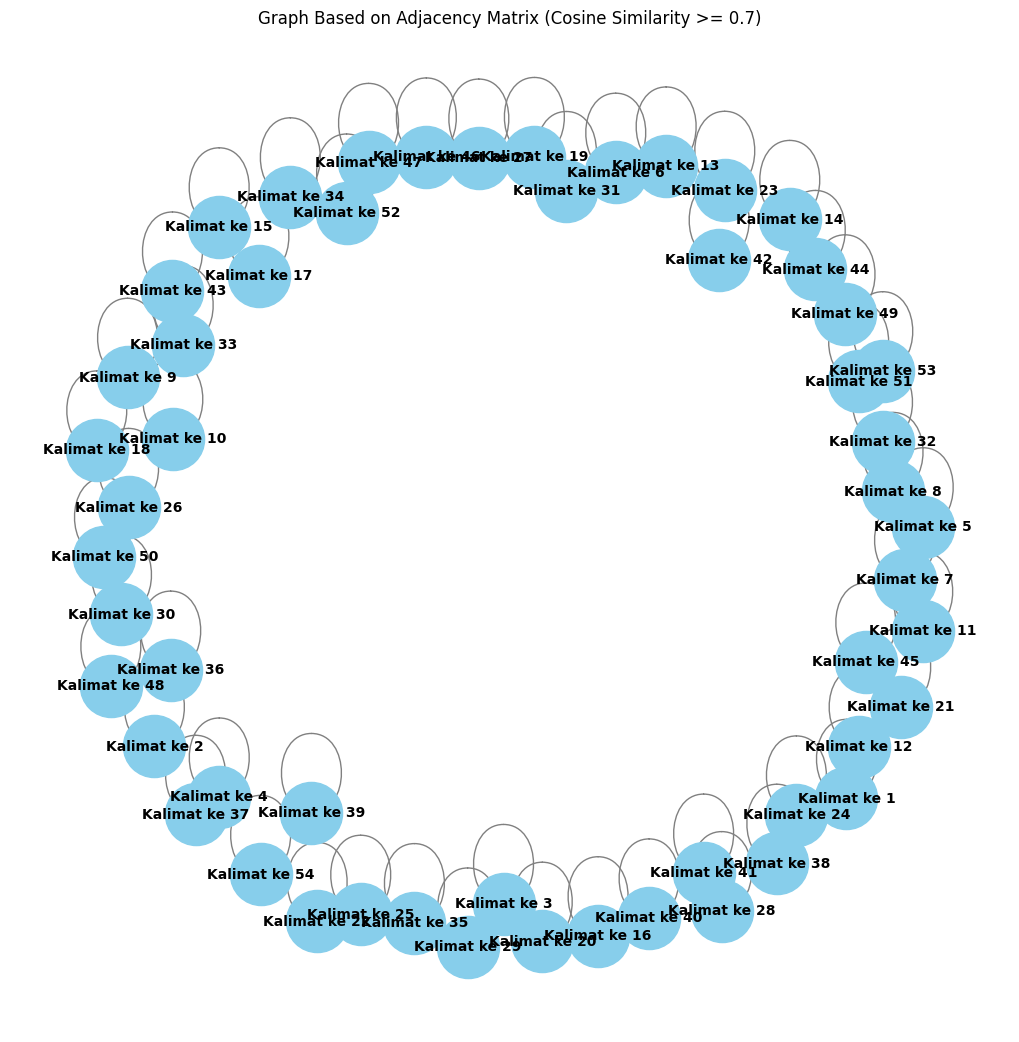

In [ ]:
# Buat graf dari matriks adjacency
G = nx.from_numpy_array(adjacency_matrix)

# Atur label node agar sesuai dengan 'kalimat ke n'
mapping = {i: f"Kalimat ke {i+1}" for i in range(len(result_df))}
G = nx.relabel_nodes(G, mapping)

# Menggambar graf
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # Atur layout graf
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_color='black', edge_color='gray', linewidths=1, font_weight='bold')

# Tampilkan graf
plt.title("Graph Based on Adjacency Matrix (Cosine Similarity >= 0.7)")
plt.show()

In [ ]:
# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Menghitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Buat dataframe untuk menampilkan hasil centrality
centrality_df = pd.DataFrame({
    'Kalimat': list(betweenness_centrality.keys()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'Degree Centrality': list(degree_centrality.values()),
    'Closeness Centrality': list(closeness_centrality.values())
})

# Tampilkan dataframe centrality
centrality_df


,Kalimat,Betweenness Centrality,Degree Centrality,Closeness Centrality
0,Kalimat ke 1,0.0,0.037736,0.000000
1,Kalimat ke 2,0.0,0.037736,0.000000
2,Kalimat ke 3,0.0,0.037736,0.000000
3,Kalimat ke 4,0.0,0.037736,0.000000
4,Kalimat ke 5,0.0,0.037736,0.000000
5,Kalimat ke 6,0.0,0.037736,0.000000
6,Kalimat ke 7,0.0,0.037736,0.000000
7,Kalimat ke 8,0.0,0.037736,0.000000
8,Kalimat ke 9,0.0,0.037736,0.000000
9,Kalimat ke 10,0.0,0.037736,0.000000


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Masukkan isi berita: Dengan penampilan tari yang penuh energi dan sketsa komedi yang kocak, Madam O berhasil memikat hati para penggemar dengan variasi kontennya yang tak pernah membosankan. Konten kreator berbakat ini memang jago menggabungkan tren musik terbaru dengan tantangan tari yang hits. Setiap video yang diunggah adalah sajian unik yang tak hanya menghibur, tetapi juga menyegarkan pikiran.  “Kami juga menunjukkan bakat komedi yang mampu membuat penonton tertawa,” ungkap admin Madam O, menambahkan sentuhan humor yang kental dalam setiap karya.  Namun, daya tarik Madam O tidak hanya terletak pada kontennya. Sosok karismatik di balik Kana Entertainment ini berhasil menciptakan hubungan yang hangat dengan pengikutnya.  Melalui interaksi langsung di kolom komentar dan tantangan seru, Madam O berhasil membuat penggemarnya merasa dekat dan akrab, menjadikannya lebih dari sekadar seorang kreator konten. Dia adalah teman.  Lebih dari itu, Kana Entertainment juga menciptakan komunitas y

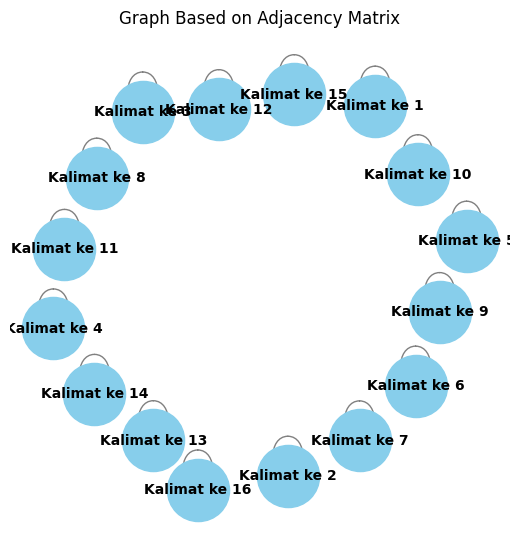


Nilai Centrality:
          Kalimat  Betweenness Centrality  Degree Centrality  \
0    Kalimat ke 1                     0.0           0.133333   
1    Kalimat ke 2                     0.0           0.133333   
2    Kalimat ke 3                     0.0           0.133333   
3    Kalimat ke 4                     0.0           0.133333   
4    Kalimat ke 5                     0.0           0.133333   
5    Kalimat ke 6                     0.0           0.133333   
6    Kalimat ke 7                     0.0           0.133333   
7    Kalimat ke 8                     0.0           0.133333   
8    Kalimat ke 9                     0.0           0.133333   
9   Kalimat ke 10                     0.0           0.133333   
10  Kalimat ke 11                     0.0           0.133333   
11  Kalimat ke 12                     0.0           0.133333   
12  Kalimat ke 13                     0.0           0.133333   
13  Kalimat ke 14                     0.0           0.133333   
14  Kalimat ke 15    

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

# Pastikan untuk mengunduh stopwords untuk bahasa Indonesia
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

# Fungsi untuk memisahkan dan memproses berita
def process_news_input(user_input):
    # Memisahkan kalimat
    result_list = []
    sentences = user_input.split('.')  # Pisahkan kalimat berdasarkan titik
    sentences = [s.strip() for s in sentences if s.strip()]  # Hilangkan spasi berlebih dan kosong
    for i, sentence in enumerate(sentences, 1):
        result_list.append({'kalimat ke n': f"Kalimat ke {i}", 'kalimat': sentence})

    result_df = pd.DataFrame(result_list)

    # Fungsi preprocessing yang disesuaikan
    def remove_url(data_berita):
        url = re.compile(r'https?://\S+|www\.S+')
        return url.sub(r'', data_berita)

    def remove_html(data_berita):
        html = re.compile(r'<.#?>')
        return html.sub(r'', data_berita)

    def remove_emoji(data_berita):
        emoji_pattern = re.compile("["u"\U0001F600-\U0001F64F"
                                   u"\U0001F300-\U0001F5FF"
                                   u"\U0001F680-\U0001F6FF"
                                   u"\U0001F1E0-\U0001F1FF""]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', data_berita)

    def remove_numbers(data_berita):
        data_berita = re.sub(r'\d+', '', data_berita)
        return data_berita

    def remove_symbols(data_berita):
        data_berita = re.sub(r'[^a-zA-Z0-9\s]', '', data_berita)
        return data_berita

    def case_folding(text):
        if isinstance(text, str):
            return text.lower()
        return text

    def tokenize(text):
        return text.split()

    def remove_stopwords(text):
        return [word for word in text if word not in stop_words]

    # Inisialisasi stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    def stemming(text):
        return [stemmer.stem(word) for word in text]

    # Looping setiap kalimat di dataframe 'result_df'
    result_df['clean'] = result_df['kalimat'].apply(remove_url)
    result_df['clean'] = result_df['clean'].apply(remove_html)
    result_df['clean'] = result_df['clean'].apply(remove_emoji)
    result_df['clean'] = result_df['clean'].apply(remove_symbols)
    result_df['clean'] = result_df['clean'].apply(remove_numbers)
    result_df['clean'] = result_df['clean'].apply(case_folding)
    result_df['tokenize'] = result_df['clean'].apply(tokenize)
    result_df['stopword removal'] = result_df['tokenize'].apply(remove_stopwords)
    result_df['stemming'] = result_df['stopword removal'].apply(stemming)

    # Gabungkan kata setelah stemming
    result_df['final'] = result_df['stemming'].apply(lambda x: ' '.join(x))

    # TF-IDF
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(result_df['final'])

    # Cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix)

    # Matriks adjacency
    threshold = 0.6
    adjacency_matrix = np.where(cosine_sim >= threshold, 1, 0)

    # Buat graf dari matriks adjacency
    G = nx.from_numpy_array(adjacency_matrix)

    # Atur label node
    mapping = {i: f"Kalimat ke {i+1}" for i in range(len(result_df))}
    G = nx.relabel_nodes(G, mapping)

    # Hitung centrality
    betweenness_centrality = nx.betweenness_centrality(G)
    degree_centrality = nx.degree_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)

    # Buat dataframe untuk centrality
    centrality_df = pd.DataFrame({
        'Kalimat': list(betweenness_centrality.keys()),
        'Betweenness Centrality': list(betweenness_centrality.values()),
        'Degree Centrality': list(degree_centrality.values()),
        'Closeness Centrality': list(closeness_centrality.values())
    })

    return result_df[['kalimat ke n', 'kalimat', 'final']], cosine_sim, adjacency_matrix, G, centrality_df

# Input dari pengguna
user_input = input("Masukkan isi berita: ")

# Proses berita dan ambil hasil
result_df, cosine_sim, adjacency_matrix, G, centrality_df = process_news_input(user_input)

# Pilih jenis centrality untuk dihitung
print("\nPilih jenis centrality yang ingin dihitung:")
print("1. Betweenness Centrality")
print("2. Degree Centrality")
print("3. Closeness Centrality")
choice = int(input("Masukkan pilihan (1/2/3): "))

# Ambil centrality sesuai pilihan
if choice == 1:
    centrality_values = centrality_df[['Kalimat', 'Betweenness Centrality']]
    centrality_name = 'Betweenness Centrality'
elif choice == 2:
    centrality_values = centrality_df[['Kalimat', 'Degree Centrality']]
    centrality_name = 'Degree Centrality'
elif choice == 3:
    centrality_values = centrality_df[['Kalimat', 'Closeness Centrality']]
    centrality_name = 'Closeness Centrality'
else:
    print("Pilihan tidak valid.")
    exit()

# Ringkasan: 3 kalimat dengan centrality tertinggi
top_sentences = centrality_values.nlargest(3, centrality_name)

# Tampilkan hasil
print("\nHasil Pemisahan Kalimat:")
print(result_df)
print("\nCosine Similarity Matrix:")
print(cosine_sim)
print("\nAdjacency Matrix:")
print(adjacency_matrix)
print("\nGraph:")
plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_color='black', edge_color='gray', linewidths=1, font_weight='bold')
plt.title("Graph Based on Adjacency Matrix")
plt.show()
print("\nNilai Centrality:")
print(centrality_df)
print(f"\nRingkasan (3 Kalimat Teratas Berdasarkan {centrality_name}):")
print(top_sentences)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Masukkan isi berita: Jakarta, CNN Indonesia -- Bukalapak buka suara soal kabar akan diakuisisi oleh marketplace asal China, Temu, yang ramai beredar belakangan ini. Sekretaris Bukalapak Cut Fika Lutfi mengatakan pihaknya tidak mengetahui soal rencana tersebut.  "Perseroan tidak mengetahui informasi terkait rencana akuisisi Perseroan oleh E-commerce dari TEMU (perusahaan dari Cina)," katanya dalam keterbukaan informasi Bursa Efek Indonesia (BEI), Selasa (8/10).  Ia menambahkan Bukalapak akan mengumumkan informasi sesuai ketentuan peraturan perundang-undangan yang berlaku jika menerima informasi yang telah diverifikasi kebenarannya atas rencana akuisisi tersebut. Terkait kenaikan harga saham Bukalapak pada 7 Oktober setelah ramai dikabarkan akan diakuisisi Temu, ia mengatakan hal tersebut belum diverifikasi kebenarannya dan tidak pernah dikonfirmasi oleh manajemen perseroan.  Spekulasi pasar, sambungnya, berada di luar kendali perseroan. Oleh karenanya, Bukalapak mengimbau agar para peme

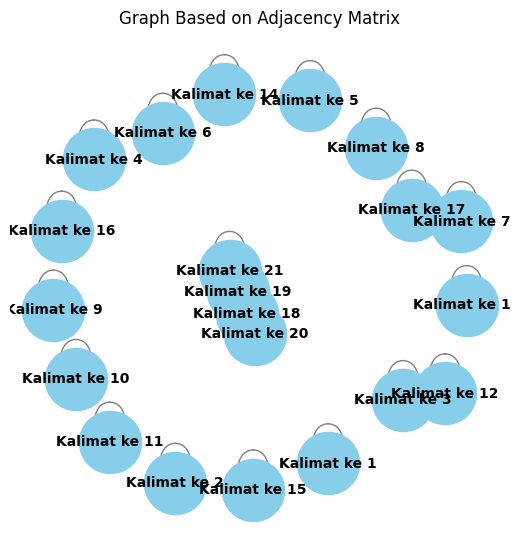


Degree Centrality:
           Kalimat  Betweenness Centrality  Degree Centrality  \
0    Kalimat ke 1                0.000000               0.10   
1    Kalimat ke 2                0.000000               0.10   
2    Kalimat ke 3                0.000000               0.10   
3    Kalimat ke 4                0.000000               0.10   
4    Kalimat ke 5                0.000000               0.10   
5    Kalimat ke 6                0.000000               0.10   
6    Kalimat ke 7                0.000000               0.10   
7    Kalimat ke 8                0.000000               0.10   
8    Kalimat ke 9                0.000000               0.10   
9   Kalimat ke 10                0.000000               0.10   
10  Kalimat ke 11                0.000000               0.10   
11  Kalimat ke 12                0.000000               0.10   
12  Kalimat ke 13                0.000000               0.10   
13  Kalimat ke 14                0.000000               0.10   
14  Kalimat ke 15  

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Download stopwords untuk bahasa Indonesia
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

# Fungsi preprocessing yang disesuaikan
def remove_url(data_berita):
    url = re.compile(r'https?://\S+|www\.S+')
    return url.sub(r'', data_berita)

def remove_html(data_berita):
    html = re.compile(r'<.#?>')
    return html.sub(r'', data_berita)

def remove_emoji(data_berita):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticon
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', data_berita)

def remove_numbers(data_berita):
    return re.sub(r'\d+', '', data_berita)

def remove_symbols(data_berita):
    return re.sub(r'[^a-zA-Z0-9\s]', '', data_berita)

def case_folding(text):
    if isinstance(text, str):
        return text.lower()
    return text

def tokenize(text):
    return text.split()

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return [stemmer.stem(word) for word in text]

# Fungsi utama
def process_news_article(news_article):
    # Memisahkan kalimat
    result_list = []
    sentences = news_article.split('.')  # Pisahkan kalimat berdasarkan titik
    sentences = [s.strip() for s in sentences if s.strip()]  # Hilangkan spasi berlebih dan kosong
    for i, sentence in enumerate(sentences, 1):
        result_list.append({'kalimat ke n': f"Kalimat ke {i}", 'kalimat': sentence})

    # Membuat DataFrame dari hasil pemisahan
    result_df = pd.DataFrame(result_list)

    # Preprocessing
    result_df['clean'] = result_df['kalimat'].apply(remove_url)
    result_df['clean'] = result_df['clean'].apply(remove_html)
    result_df['clean'] = result_df['clean'].apply(remove_emoji)
    result_df['clean'] = result_df['clean'].apply(remove_symbols)
    result_df['clean'] = result_df['clean'].apply(remove_numbers)
    result_df['clean'] = result_df['clean'].apply(case_folding)
    result_df['tokenize'] = result_df['clean'].apply(tokenize)
    result_df['stopword removal'] = result_df['tokenize'].apply(remove_stopwords)
    result_df['stemming'] = result_df['stopword removal'].apply(stemming)

    # Gabungkan kata setelah stemming
    result_df['final'] = result_df['stemming'].apply(lambda x: ' '.join(x))

    # TF-IDF
    documents = result_df['final'].tolist()
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
    tfidf_df.insert(0, 'kalimat ke n', result_df['kalimat ke n'])

    # Cosine Similarity
    cosine_sim = cosine_similarity(tfidf_matrix)
    cosine_sim_df = pd.DataFrame(cosine_sim, index=result_df['kalimat ke n'], columns=result_df['kalimat ke n'])

    # Matriks adjacency
    threshold = 0.3
    adjacency_matrix = np.where(cosine_sim >= threshold, 1, 0)
    adjacency_df = pd.DataFrame(adjacency_matrix, index=result_df['kalimat ke n'], columns=result_df['kalimat ke n'])

    # Buat graf
    G = nx.from_numpy_array(adjacency_matrix)
    mapping = {i: f"Kalimat ke {i+1}" for i in range(len(result_df))}
    G = nx.relabel_nodes(G, mapping)

    # Menghitung centrality
    betweenness_centrality = nx.betweenness_centrality(G)
    degree_centrality = nx.degree_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)

    # Buat dataframe centrality
    centrality_df = pd.DataFrame({
        'Kalimat': list(betweenness_centrality.keys()),
        'Betweenness Centrality': list(betweenness_centrality.values()),
        'Degree Centrality': list(degree_centrality.values()),
        'Closeness Centrality': list(closeness_centrality.values())
    })

    # Meminta input pengguna untuk memilih jenis centrality
    print("\nPilih centrality yang ingin dihitung:")
    print("1: Betweenness Centrality")
    print("2: Degree Centrality")
    print("3: Closeness Centrality")
    choice = int(input("Masukkan pilihan (1/2/3): "))

    if choice == 1:
        centrality_values = betweenness_centrality
        centrality_label = "Betweenness Centrality"
    elif choice == 2:
        centrality_values = degree_centrality
        centrality_label = "Degree Centrality"
    elif choice == 3:
        centrality_values = closeness_centrality
        centrality_label = "Closeness Centrality"
    else:
        print("Pilihan tidak valid.")
        return

    # Mengambil 3 kalimat dengan nilai centrality tertinggi
    top_sentences = sorted(centrality_values.items(), key=lambda x: x[1], reverse=True)[:3]
    summary = [f"{sentence[0]} (Skor: {sentence[1]:.4f})" for sentence in top_sentences]

    # Menampilkan hasil
    print("\nHasil Preprocessing:")
    print(result_df[['kalimat ke n', 'final']])

    print("\nTF-IDF Matrix:")
    print(tfidf_df)

    print("\nCosine Similarity Matrix:")
    print(cosine_sim_df)

    print("\nMatriks Adjacency:")
    print(adjacency_df)

    # Menggambar graf
    plt.figure(figsize=(5, 5))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_color='black', edge_color='gray', linewidths=1, font_weight='bold')
    plt.title("Graph Based on Adjacency Matrix")

    plt.show()

    print(f"\n{centrality_label}:\n", centrality_df)
    print("\nRingkasan isi berita (3 kalimat teratas):")
    for sentence in summary:
        print(sentence)

# Contoh penggunaan
input_news_article = input("Masukkan isi berita: ")
process_news_article(input_news_article)
